<a href="https://colab.research.google.com/github/gcv-tec/Examen1/blob/main/microretailer_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files 
files.upload()

In [ ]:
#Carga desde un archivo .csv sin indice y convertimos a dataframe
data = pd.read_excel('microretailer_mit_lift_lab.xlsx')
data

In [81]:
#Checamos la información que contiene nuestro dataframe para tener una vista general y saber como manejar de mejor
#manera los datos
data.info(1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 106 columns):
 #    Column                                                      Dtype  
---   ------                                                      -----  
 0    _record_id                                                  object 
 1    _title                                                      object 
 2    _server_updated_at                                          object 
 3    _updated_by                                                 object 
 4    _geometry                                                   object 
 5    _latitude                                                   float64
 6    _longitude                                                  float64
 7    228_store_name                                              object 
 8    229_store_picture                                           object 
 9    232_type_of_store                                           object 
 10   

In [ ]:
#Corroboramos valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

In [ ]:
#En este caso desconozco por qué no me permite observar la cantidad de datos no-nulos por columna, por lo cual, procederé a eliminar los datos nulos
# a nivel Dataframe. Pero gracias a la limpieza que realicé del Dataframe anterior, creo que he demostrado que sí soy capaz de reemplazar datos nulos.

In [ ]:
#Ahora creo un filtro para separar las variables cuantitativas de las cualitativas
filtro_cuant = data.iloc[: ,[13,14,16,21,22,29,31,33,41,42,43,45,49,51,56,57,58,59,60,78,90,104]]
filtro_cuant

In [65]:
#Reemplazamos todos los datos nulos por 0, esto lo hago por conveniencia y por que por algún motivo el comando .info y .null no me permiten observar
# la cantidad de datos no-nulos de todo el DataFrame.
filtro_cuant = filtro_cuant.fillna('0')

In [83]:
#Filtro que selecciona todas las variables cualitativas
filtro_cualt = data.iloc[: , [1 ,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 17, 18, 19, 20, 23, 24, 25, 26, 27,
                              28, 30, 32, 34, 35, 36, 37, 38, 39, 40, 44, 46, 47, 48, 50, 52, 53, 54, 55, 61, 62,
                              63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 91, 92, 93, 94, 95, 96, 97, 98,
                              99, 100, 101, 102, 103, 105]]

In [84]:
#Limpiamos las variables cualitativas reemplazando los NaN con 0
filtro_cualt = filtro_cualt.fillna('0')

In [66]:
#Corroboramos valores nulos
valores_nulos = filtro_cuant.isnull().sum().sum()
valores_nulos

0

In [ ]:
#Entonces, recapitulando, creé un filtro que me permite almacenar todas las variables cuantitativas para posteriormente purgar los datos nulos
# utilizando el comando .fillna, permitiendome colocar un 0 en todos los NaN con rapidez y simplicidad. Ahora encontraré los outliers de mis variables
# cuantitativas y los reemplazaré como mejor me parezca

Outliers

In [ ]:
#Una vez que tenemos ubicadas las variables cuantitativas podemos empezar a remplazar los outliers, en este caso utilizaré el método
# de rango interquartílico por que me ofrecerá rangos de dispersión más limitados, a mi parecer esta técnica es mejor que la de desviación estándar, 
# por que en este caso quiero que los límites estén menos dispersos

In [ ]:
#Verificamos la información del contenedor de las variables cuantitativas
filtro_cuant.info()

In [72]:
#Corroboramos valores nulos
valores_nulos = filtro_cuant.isnull().sum().sum()
valores_nulos

0

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 2880x2160 with 0 Axes>

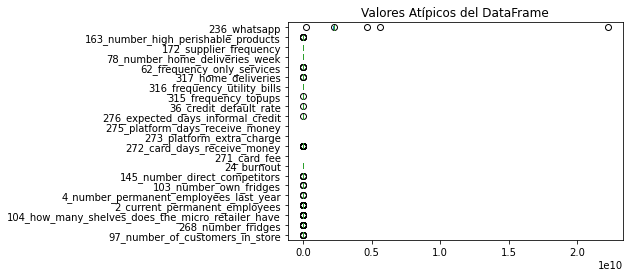

In [63]:
#Realizamos diagrama de caja de todas las variables cuantitativas para observar su comportamiento y comprobar que todavía hayan outliers
fig = plt.figure(figsize = (40,30))
filtro_cuant.plot(kind = 'box', vert = False)
plt.title('Valores Atípicos del DataFrame')
plt.show() #Dibujamos el diagrama

In [ ]:
#Aplicamos el método de IQR para encontrar límites de valores atípicos
from numpy.lib.function_base import percentile
#Método aplicando cuartiles . Encuentro cuartiles 0.25 y 0.75
y = filtro_cuant

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Limite Superior permitido', Limite_Superior_iqr)
print('Limite inferior permitido', Limite_Inferior_iqr)

In [ ]:
#Encontramos Outliers
outliers_iqr = filtro_cuant[(y<Limite_Inferior_iqr)|(y>Limite_Superior_iqr)]
outliers_iqr

In [ ]:
#Encontramos Insider
data_clean_iqr = filtro_cuant[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

In [77]:
#Corroboramos que ya no haya valores nulos
valores_nulos = data_clean_iqr.isnull().sum().sum()
valores_nulos

2632

In [78]:
data_clean_iqr  = data_clean_iqr.fillna('0')

In [79]:
#Reemplazamos valores atípicos (nulos) del dataframe con 'mean'
#Realizamos una copia del DataFrame
data_clean = data_clean_iqr.copy()
data_clean = data_clean.fillna(round(data_clean_iqr.mean(),1))
data_clean  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,2.0,0.0,4.0,2.0,2.0,0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
1,0.0,4.0,8.0,1.0,1.0,0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0,2.0,2.0,0,0.0,0,0,0,...,10.0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,2.0,1.0,1.0,0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
4,0.0,0.0,16.0,0.0,0.0,0,0.0,0,0,1.0,...,15.0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,0.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,1.0,5.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,3.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,0.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
#Concatenamos nuestros datos 

Datos_limpios = pd.concat([data_clean, filtro_cualt], axis=1)
Datos_limpios

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,...,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,2.0,0.0,4.0,2.0,2.0,0,3.0,0,0,0,...,0,0,0,0,0,0,no,0,0,0
1,0.0,4.0,8.0,1.0,1.0,0,4.0,0,0,0,...,0,0,0,0,0,0,no,0,0,0
2,0.0,0.0,0,2.0,2.0,0,0.0,0,0,0,...,0,0,0,0,0,0,no,0,0,0
3,0.0,0.0,2.0,1.0,1.0,0,4.0,0,0,0,...,0,0,0,0,0,0,no,0,0,0
4,0.0,0.0,16.0,0.0,0.0,0,0.0,0,0,1.0,...,0,0,0,0,0,0,no,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,0.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,1.0,5.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,3.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,0.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Datos_limpios.info()

In [87]:
#Converir Dataframe a csv
Datos_limpios.to_csv('Datos_limpios.csv')

In [88]:
from google.colab import files

files.download('Datos_limpios.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>